# Spam Detector

## Problem Statement:
The client wants a spam detector so that employees get only relevant messages/email and it filters out all irrelevant/spam messages.Need to develop a spam detector so that whenever a new message hits inbox, the model should be able to guage whether it is a spam or an ham message.

### 1)Importing libraries

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

### 2 ) Importing dataset & Exploratory Data Analysis

In [2]:
data=pd.read_csv('emails_V2.csv', encoding='ISO-8859-1')

In [3]:
data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [4]:
data.tail()

,text,spam
2038,Subject: the installation of the equipment you...,0
2039,Subject: all about current and near future gas...,0
2040,Subject: maureen ' s expenses it appears that...,0
2041,Subject: interview - numerical methods & finan...,0
2042,"Subject: sevil yaman hi norma , sevil ' s pr...",0


In [5]:
data.shape

(2043, 2)

In [6]:
data.dtypes

text    object
spam     int64
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2043 non-null   object
 1   spam    2043 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 32.0+ KB


In [8]:
data.describe()

,spam
count,2043.000000
mean,0.669604
std,0.470471
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [9]:
data.isnull().sum()

text    0
spam    0
dtype: int64

In [10]:
ham_spam=data.groupby('spam').size()
ham_spam

spam
0     675
1    1368
dtype: int64

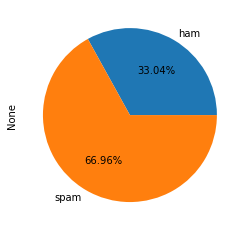

In [11]:
ham_spam.plot.pie(autopct='%.2f%%', labels=['ham','spam'])

### 3)Univariate analysis

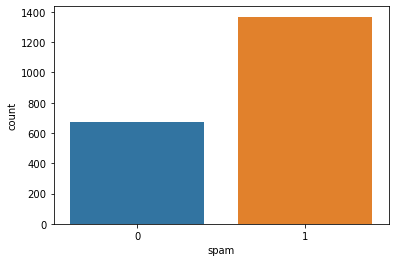

In [12]:
sns.countplot(data['spam'])

In [13]:
spam=data[data['spam']==1]
spam.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


## 4)Data cleaning
    punctuations
    stopwords

In [20]:
import string
import nltk
from nltk.corpus import stopwords
string.punctuation, stopwords.words('english')

('!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~',
 ['i',
  'me',
  'my',
  'myself',
  'we',
  'our',
  'ours',
  'ourselves',
  'you',
  "you're",
  "you've",
  "you'll",
  "you'd",
  'your',
  'yours',
  'yourself',
  'yourselves',
  'he',
  'him',
  'his',
  'himself',
  'she',
  "she's",
  'her',
  'hers',
  'herself',
  'it',
  "it's",
  'its',
  'itself',
  'they',
  'them',
  'their',
  'theirs',
  'themselves',
  'what',
  'which',
  'who',
  'whom',
  'this',
  'that',
  "that'll",
  'these',
  'those',
  'am',
  'is',
  'are',
  'was',
  'were',
  'be',
  'been',
  'being',
  'have',
  'has',
  'had',
  'having',
  'do',
  'does',
  'did',
  'doing',
  'a',
  'an',
  'the',
  'and',
  'but',
  'if',
  'or',
  'because',
  'as',
  'until',
  'while',
  'of',
  'at',
  'by',
  'for',
  'with',
  'about',
  'against',
  'between',
  'into',
  'through',
  'during',
  'before',
  'after',
  'above',
  'below',
  'to',
  'from',
  'up',
  'down',
  'in',
  'out',
  'on',
  'off',
  'over',
 

In [32]:
def cleaning_row(text):
    l_punc=[char for char in text if char not in string.punctuation]
    l_punc="".join(l_punc)
    l_stopwords=[word for word in l_punc.split() if word.lower() not in stopwords.words('english') ]
    return l_stopwords

In [36]:
# df['text'].apply(cleaning_row)

vectorizer= CountVectorizer(analyzer= cleaning_row)
df= vectorizer.fit_transform(data['text'])
df.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [37]:
df.shape

(2043, 24606)

In [39]:
X=df
Y=data['spam']
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1634, 24606), (409, 24606), (1634,), (409,))

### 5)Model

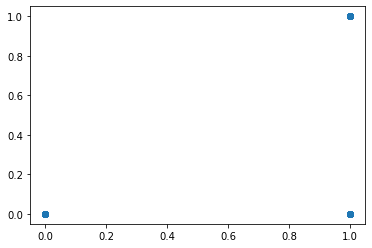

In [43]:
#Logistic Regression
model=LogisticRegression()
model.fit(X_train,Y_train)
Y_pred= model.predict(X_test)
plt.scatter(Y_pred,Y_test)

### 6) Performance

In [48]:
cm=confusion_matrix(Y_test, Y_pred)
accuracy= accuracy_score(Y_test, Y_pred)
print(cm)
accuracy

[[124  11]
 [  0 274]]


0.9731051344743277

## Decision Tree

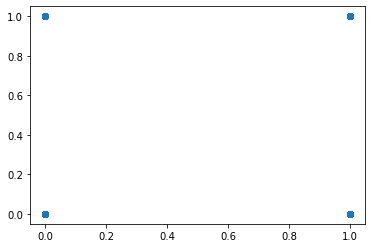

In [50]:
model= DecisionTreeClassifier(random_state=0)
model.fit(X_train, Y_train)
Y_pred= model.predict(X_test)
plt.scatter(Y_pred, Y_test)

In [51]:
cm=confusion_matrix(Y_pred, Y_test)
accuracy= accuracy_score(Y_pred, Y_test)
print(cm)
accuracy

[[120   6]
 [ 15 268]]


0.9486552567237164

## Random Forest

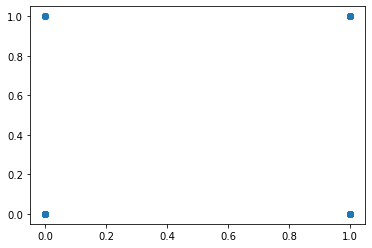

In [54]:
model= RandomForestClassifier(n_estimators=10, random_state=0)
model.fit(X_train, Y_train)
Y_pred= model.predict(X_test)
plt.scatter(Y_pred, Y_test)

In [55]:
cm=confusion_matrix(Y_pred, Y_test)
accuracy= accuracy_score(Y_pred, Y_test)
print(cm)
accuracy

[[124   4]
 [ 11 270]]


0.9633251833740831

## Naive Bayes

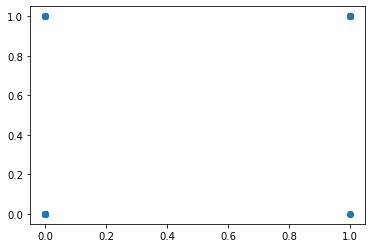

In [58]:
model= MultinomialNB()
model.fit(X_train, Y_train)
Y_pred= model.predict(X_test)
plt.scatter(Y_pred, Y_test)

In [59]:
cm=confusion_matrix(Y_pred, Y_test)
accuracy= accuracy_score(Y_pred, Y_test)
print(cm)
accuracy

[[133   5]
 [  2 269]]


0.9828850855745721